# Airbnb Market Trends

## Importing libraries and data

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
import numpy as np


In [2]:
# Importing the data

price = pd.read_csv('data/airbnb_price.csv')
last_review = pd.read_csv('data/airbnb_last_review.tsv', sep='\t')
room_type = pd.read_excel('data/airbnb_room_type.xlsx')

## Data preparation

In [3]:
# Price dataset
price.info()
price.head()

price.nbhood_full = price.nbhood_full.astype('category')
price.price = price.price.str.removesuffix(' dollars').astype('int32')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   price        25209 non-null  object
 2   nbhood_full  25209 non-null  object
dtypes: int64(1), object(2)
memory usage: 591.0+ KB


In [4]:
# Last_review dataset
last_review.info()
last_review.host_name = last_review.host_name.astype('category')
last_review['last_review'] = pd.to_datetime(last_review.last_review)
last_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   host_name    25201 non-null  object
 2   last_review  25209 non-null  object
dtypes: int64(1), object(2)
memory usage: 591.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   listing_id   25209 non-null  int64         
 1   host_name    25201 non-null  category      
 2   last_review  25209 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](1), int64(1)
memory usage: 758.8 KB


In [5]:
# Room_type
room_type.info()
room_type.room_type = room_type.room_type.str.lower()
room_type.room_type.nunique()
room_type.room_type = room_type.room_type.astype('category')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   description  25199 non-null  object
 2   room_type    25209 non-null  object
dtypes: int64(1), object(2)
memory usage: 591.0+ KB


## Data exploration

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   listing_id   25209 non-null  int64   
 1   price        25209 non-null  int32   
 2   nbhood_full  25209 non-null  category
dtypes: category(1), int32(1), int64(1)
memory usage: 354.6 KB


<Axes: xlabel='price', ylabel='Count'>

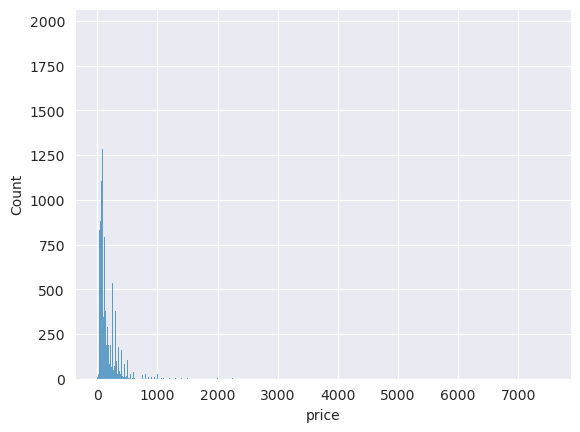

In [6]:
# Price dataset
price.info()
sns.histplot(data=price, x='price')

,mean,std,min,max
nbhood_full,,,,
"Brooklyn, Sea Gate",805.000000,961.665222,125,1485
"Manhattan, Tribeca",396.704918,313.922195,80,2000
"Manhattan, Flatiron District",342.055556,267.057291,65,1500
"Manhattan, NoHo",335.024390,273.300612,80,1795
"Manhattan, SoHo",299.162304,350.522572,45,3000
...,...,...,...,...
"Staten Island, Bull's Head",48.000000,28.583212,25,80
"Queens, Little Neck",45.000000,NaN,45,45
"Bronx, Hunts Point",42.750000,9.696532,35,65


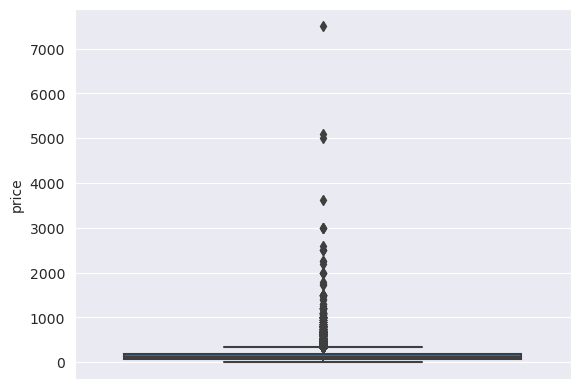

In [7]:
sns.boxplot(data=price, y='price')
price.groupby('nbhood_full')['price'].agg(['mean', 'std', 'min', 'max']).sort_values(by='mean', ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   listing_id   25209 non-null  int64   
 1   description  25199 non-null  object  
 2   room_type    25209 non-null  category
dtypes: category(1), int64(1), object(1)
memory usage: 418.8+ KB


/home/carlos/.conda/envs/conda_data_analysis/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


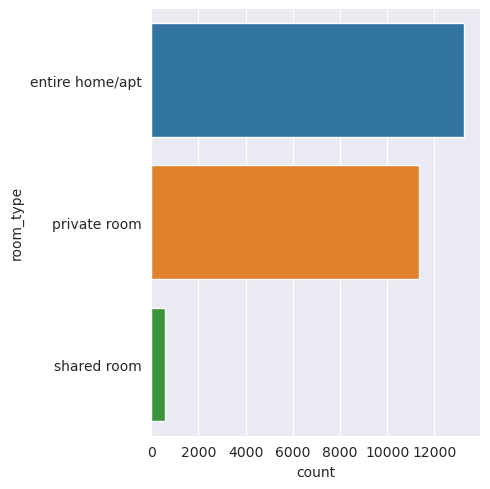

In [8]:
# room_type dataset

room_type.info()
room_type.room_type.nunique()
sns.catplot(data=room_type, y='room_type', kind='count')

## Joining data for further exploration

In [9]:
data = price.copy(deep=True)
data = data.merge(room_type, on='listing_id')
data = data.merge(last_review, on='listing_id')

print(price.info())
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   listing_id   25209 non-null  int64   
 1   price        25209 non-null  int32   
 2   nbhood_full  25209 non-null  category
dtypes: category(1), int32(1), int64(1)
memory usage: 354.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   listing_id   25209 non-null  int64         
 1   price        25209 non-null  int32         
 2   nbhood_full  25209 non-null  category      
 3   description  25199 non-null  object        
 4   room_type    25209 non-null  category      
 5   host_name    25201 non-null  category      
 6   last_review  25209 non-null  datetime64[ns]
dtypes: category(3), datetime64[ns](1), int32(1), int64(1), 

## Data exploration with the complete data set

/home/carlos/.conda/envs/conda_data_analysis/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


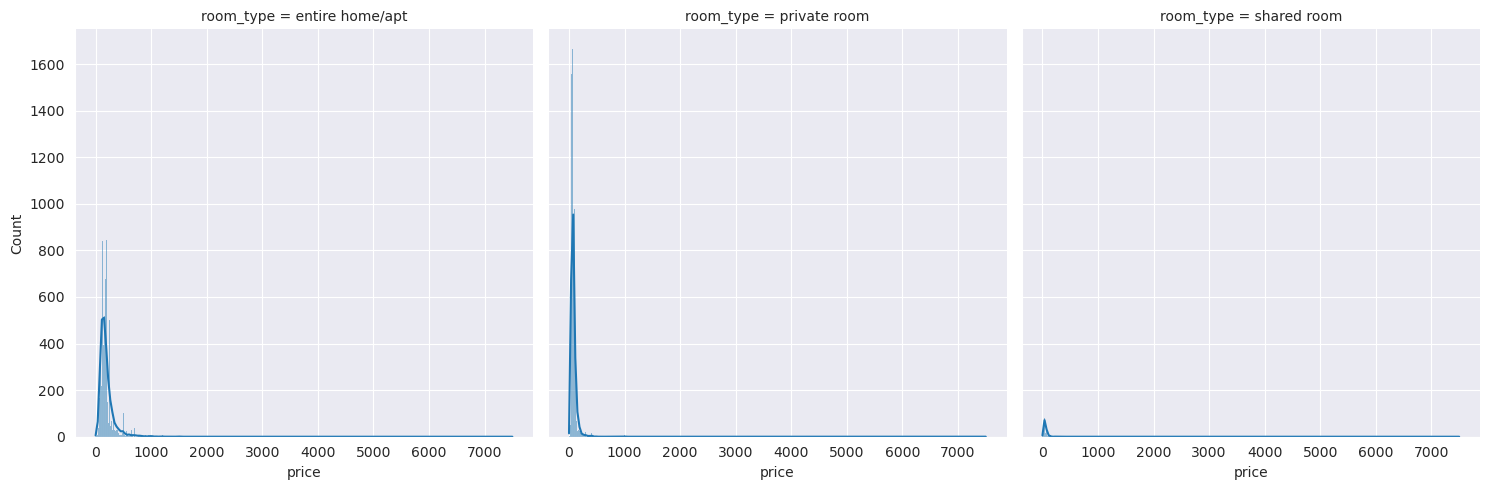

In [10]:
sns.displot(data=data, x='price', col_wrap=3, col='room_type', kde=True)

/home/carlos/.conda/envs/conda_data_analysis/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


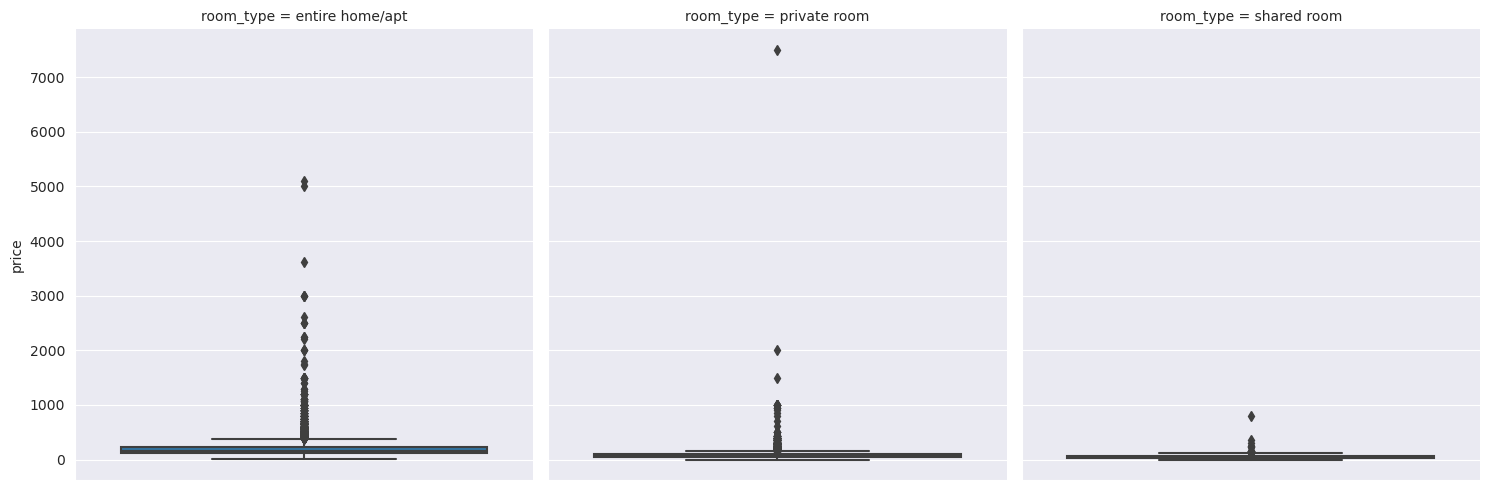

In [11]:
sns.catplot(data=data, y='price', col='room_type', kind='box')

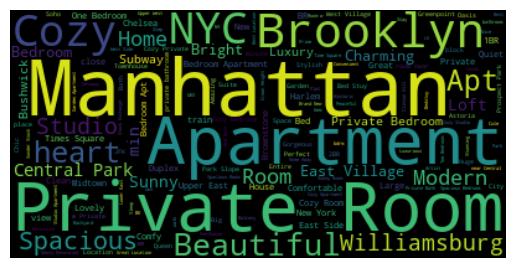

In [12]:
# Wordcloud

description = ''
# print(type(description))
for _, d in data.description.items():
    description = ", ".join([description, str(d)])

stopwords = set(STOPWORDS)
wc_descriptions = WordCloud(stopwords=stopwords).generate(description)
plt.imshow(wc_descriptions, interpolation='bilinear')
plt.axis('off')
plt.show()

In [13]:
# Sentiment analysis for the description

def check_sentiment(description: str) -> float:
    return TextBlob(str(description)).sentiment.polarity

data['sentiment_score'] = data.description.apply(check_sentiment)

/home/carlos/.conda/envs/conda_data_analysis/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


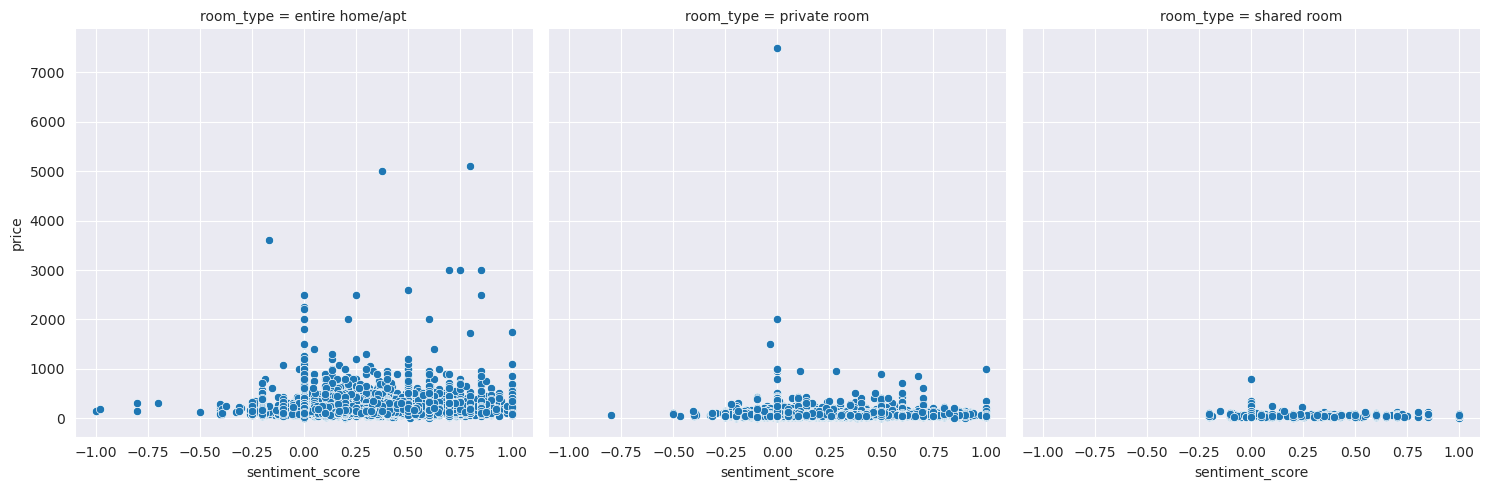

In [14]:
sns.relplot(data=data, x='sentiment_score', y='price', kind='scatter', col='room_type')

/home/carlos/.conda/envs/conda_data_analysis/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


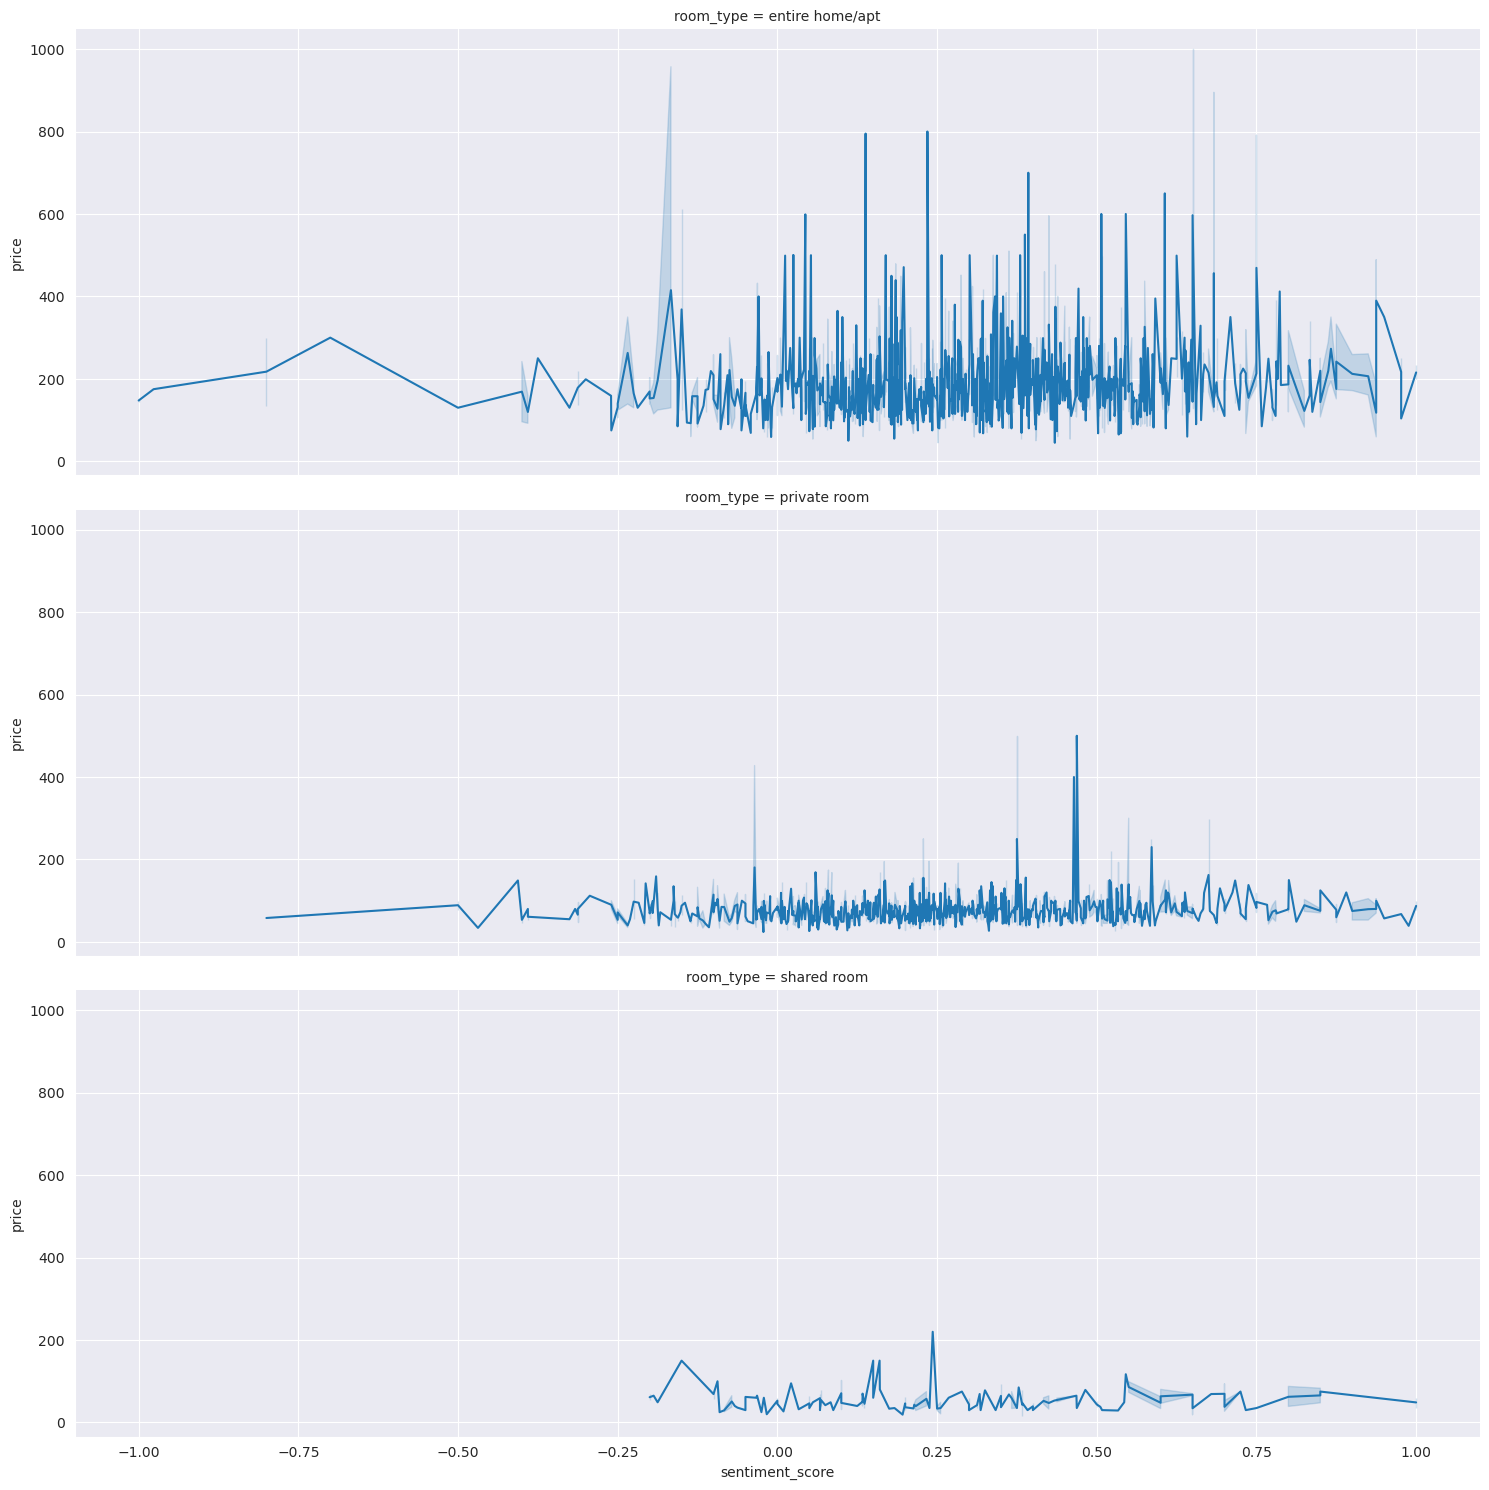

In [15]:
sns.relplot(data=data, x='sentiment_score', y='price', kind='line', aspect=3, row='room_type')

<Axes: xlabel='sentiment_score', ylabel='price'>

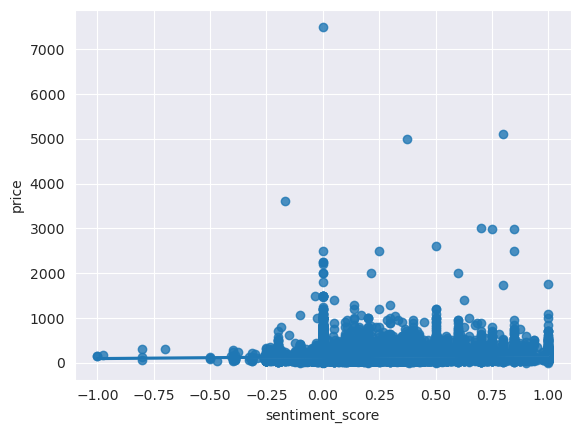

In [16]:

sns.regplot(data=data, x='sentiment_score', y='price')

<Axes: xlabel='sentiment_score', ylabel='price'>

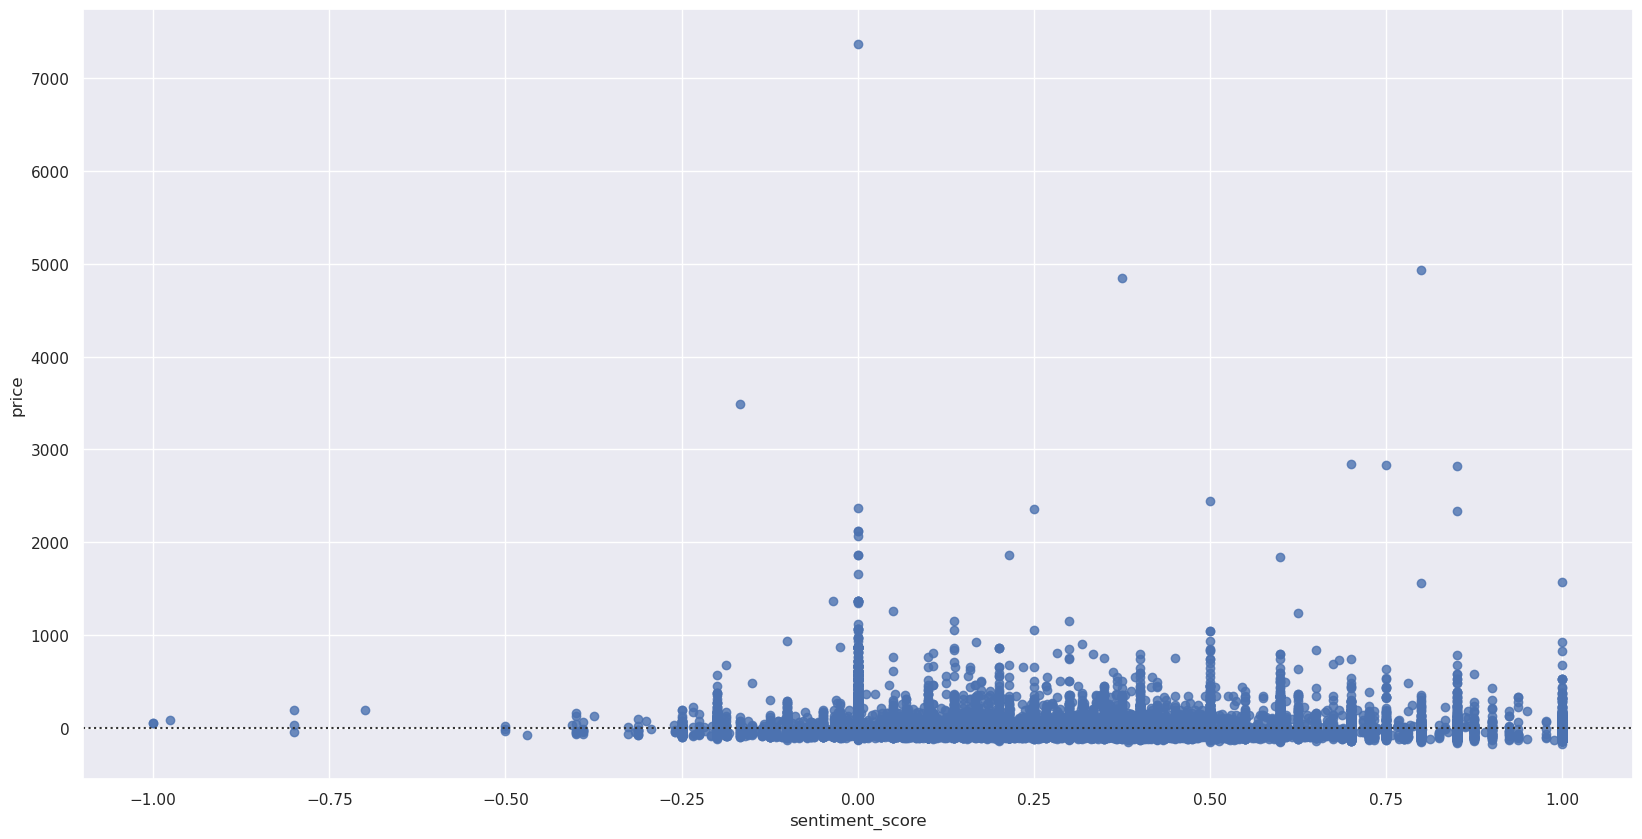

In [17]:
sns.set_theme(rc={'figure.figsize': (20, 10)})
sns.residplot(data=data, x='sentiment_score', y='price')

/home/carlos/.conda/envs/conda_data_analysis/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


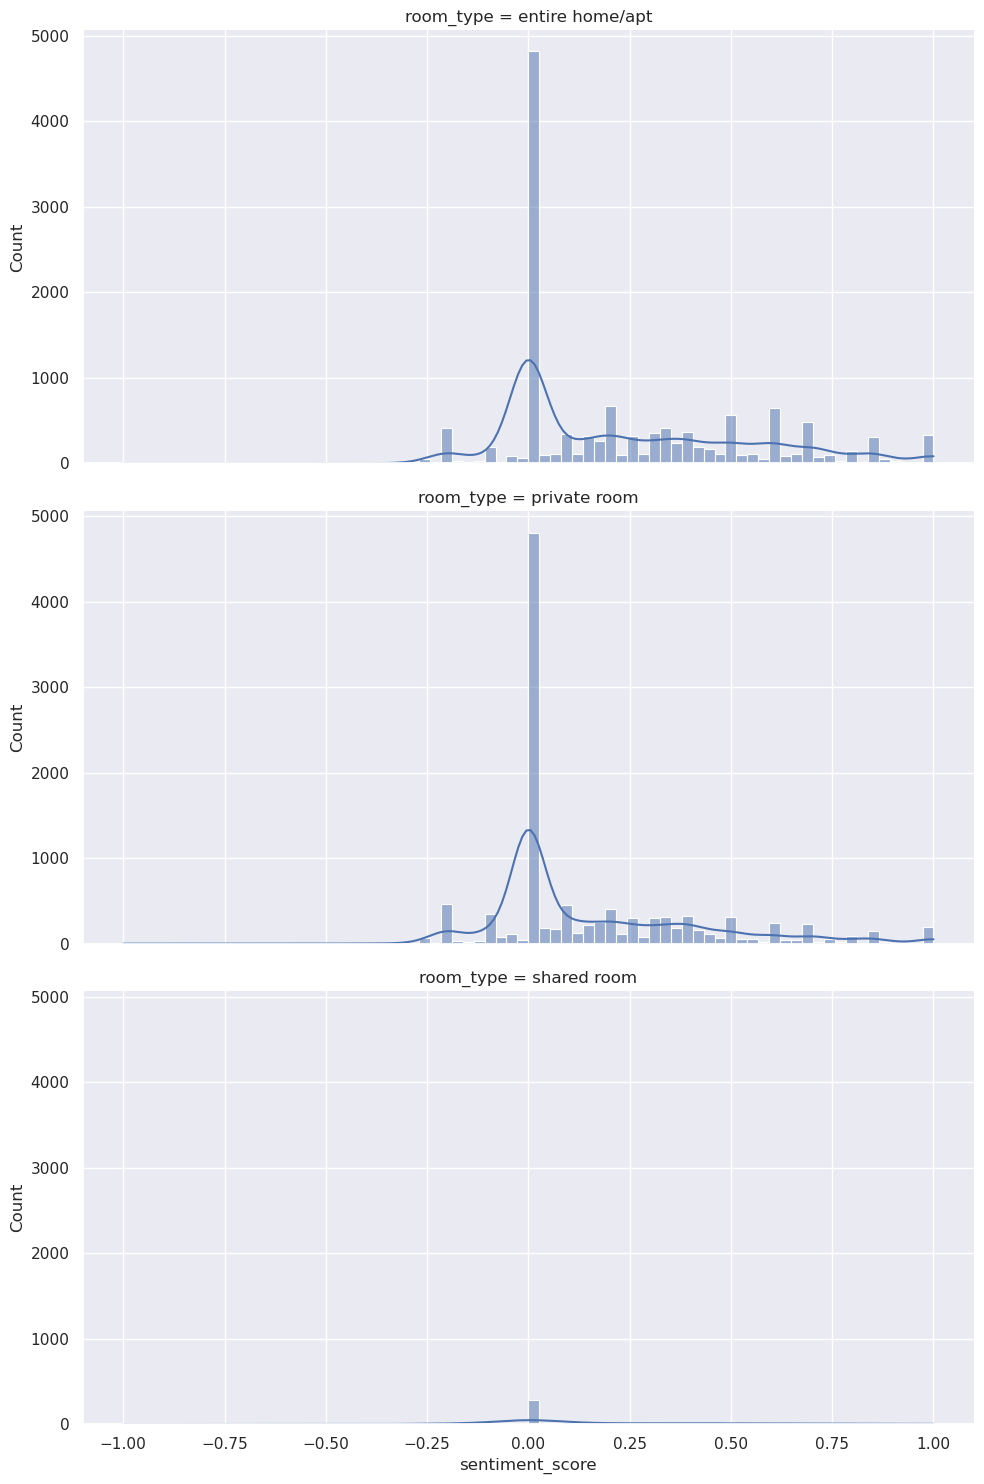

In [18]:
sns.displot(data=data, x='sentiment_score', row='room_type', aspect=2, kde=True)

## Datacamp tasks

### What are the dates of the earliest and most recent reviews? Store these values as two separate variables with your preferred names.

In [20]:
earliest = np.min(data.last_review)
latest = np.max(data.last_review)

print(earliest)
print(latest)

2019-01-01 00:00:00
2019-07-09 00:00:00


### How many of the listings are private rooms? Save this into any variable.

In [21]:
private = room_type[room_type.room_type == 'private room']
n_private = private.shape[0]
print(n_private)

11356


### What is the average listing price? Round to the nearest two decimal places and save into a variable.

In [22]:
avg_price = np.round(np.mean(price.price), 2)
print(avg_price)

141.78


### Combine the new variables into one DataFrame called review_dates with four columns in the following order: first_reviewed, last_reviewed, nb_private_rooms, and avg_price. The DataFrame should only contain one row of values

In [26]:
review_dates = pd.DataFrame({'first_review': [earliest], 'last_reviewed': [latest], 'nb_private_rooms': [n_private], 'avg_price': [avg_price]})
print(review_dates)

  first_review last_reviewed  nb_private_rooms  avg_price
0   2019-01-01    2019-07-09             11356     141.78
